In [24]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [2]:
#import the dataset
data = datasets.load_breast_cancer()

In [3]:
#print(df['DESCR'])

In [4]:
data2 = datasets.load_breast_cancer(return_X_y=True)

In [5]:
print(data2)

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 

In [6]:
data_ss = StandardScaler().fit_transform(data.data)
df = pd.DataFrame(data_ss, columns=data.feature_names)
y = pd.Series(data.target)

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [8]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [9]:
x = df.iloc[:, [0,1,2,3]].values

In [10]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 1 1 0 1 3 1 2 2 2 2 3 1 2 2 2 3 1 1 3 3 0 3 1 1 1 2 1 2 1 1 0 1 1 3 1 2
 3 2 2 2 0 1 3 2 1 0 3 0 2 2 3 0 1 2 0 1 2 3 0 0 0 2 0 2 2 0 0 0 3 1 0 1 3
 0 3 3 1 1 3 0 3 4 1 0 1 2 1 2 3 2 2 3 3 3 1 0 0 0 3 2 0 0 0 0 3 0 0 4 0 0
 2 3 0 0 2 0 3 2 1 0 1 4 3 3 3 2 1 3 1 0 3 1 3 1 2 0 0 3 0 0 3 0 3 0 0 0 3
 3 3 2 0 0 0 3 0 1 1 0 0 0 1 1 2 4 3 0 1 1 3 0 3 3 0 0 0 0 1 2 3 4 1 3 0 2
 0 1 0 0 0 2 2 0 2 2 3 2 1 1 3 0 1 4 2 0 3 0 1 2 3 1 0 4 1 2 3 0 0 1 1 3 3
 0 3 3 3 0 3 2 2 1 2 2 1 0 2 4 1 2 2 3 0 0 2 1 0 3 3 2 0 1 0 1 1 1 3 1 3 2
 2 1 1 1 3 1 1 0 2 3 0 3 0 4 0 1 0 0 1 3 3 1 0 1 3 3 0 0 3 0 0 3 3 3 0 3 3
 0 0 3 2 1 0 1 0 0 2 3 0 3 3 0 3 3 0 0 0 0 1 0 0 0 1 3 1 0 3 3 0 1 1 3 3 0
 0 0 1 3 1 0 4 3 0 0 1 0 0 0 3 0 0 0 3 4 2 0 3 3 3 0 0 0 2 3 3 3 1 1 0 4 4
 1 3 1 1 3 3 0 2 3 0 0 0 2 0 3 2 0 3 0 1 0 0 3 4 0 3 3 3 0 0 1 0 3 3 0 0 3
 2 1 0 0 0 0 2 2 2 0 3 3 0 0 3 0 3 0 0 0 0 0 3 2 0 1 1 3 3 3 3 3 3 0 1 3 0
 1 2 1 3 3 1 2 1 2 3 3 2 2 2 2 2 1 4 2 0 3 3 2 0 1 0 0 2 3 2 0 3 3 3 0 3 0
 3 3 3 3 3 3 1 0 1 2 3 1 

array([[-0.91466628, -0.53951156, -0.90757854, -0.81398616],
       [ 1.32748365,  0.57598781,  1.31882798,  1.27928464],
       [-0.2029269 ,  1.18966495, -0.19276631, -0.26246587],
       [-0.00841951, -0.62080405, -0.02189868, -0.10948369],
       [ 2.77022317,  0.61830596,  2.80495515,  3.21320332]])

# Elbow Method

Got the implementation from this website: https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

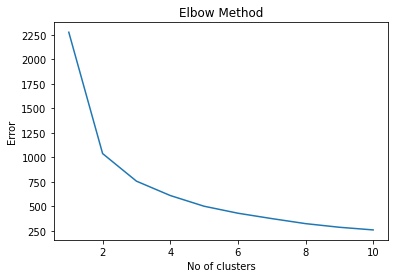

In [12]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

This obviously shows that the number of clusters chosen was not right. There needs to be a graph that shows a steep decline to determine the right number of clusters

## Second Approach with all features

In [13]:
kmeans5_2 = KMeans(n_clusters=5)
y_kmeans5_2 = kmeans5.fit_predict(df)
print(y_kmeans5_2)

kmeans5.cluster_centers_

[2 0 0 3 0 3 0 3 3 3 1 0 2 1 3 3 0 3 0 1 4 4 3 0 0 2 3 0 3 0 2 3 0 0 3 0 3
 1 1 3 1 4 2 3 1 0 4 3 1 1 1 1 1 0 1 4 0 3 1 4 4 4 3 4 3 3 4 1 3 1 0 3 3 1
 1 0 4 2 2 1 4 3 2 0 4 0 4 0 4 3 1 1 1 1 0 0 4 4 1 4 1 4 1 4 4 3 4 1 2 4 4
 4 3 4 4 4 4 3 3 0 1 0 2 1 1 1 1 0 4 0 4 0 0 1 0 1 1 1 0 4 1 0 4 1 1 4 3 4
 1 1 4 3 3 4 4 1 0 1 1 1 4 0 0 4 0 1 1 0 0 1 4 1 3 4 1 4 3 3 1 1 2 2 0 1 1
 4 0 1 4 1 3 1 1 3 3 1 3 0 0 3 4 0 2 3 4 1 4 0 3 1 0 1 2 3 3 3 4 4 0 0 1 4
 4 0 1 1 4 1 1 3 0 1 1 0 4 1 2 0 1 0 1 1 3 1 0 4 1 3 4 4 2 1 2 0 0 4 2 3 2
 3 0 1 0 1 0 2 4 1 1 4 1 1 2 4 0 4 1 0 1 1 0 1 0 3 1 1 4 1 4 4 3 1 4 1 1 1
 1 1 1 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 4 1 1 0 3 1 4 0 4 2 1 1 1 1 0 0 0 4 4
 1 1 0 1 0 4 2 1 4 4 0 4 4 1 1 4 4 1 3 2 0 1 4 4 1 4 4 1 1 1 1 1 0 2 1 0 2
 3 1 0 0 1 1 3 1 1 3 4 1 1 4 1 1 1 1 4 0 4 4 3 2 4 1 1 1 1 1 3 1 1 1 1 4 1
 1 0 1 1 4 1 1 1 4 4 2 1 1 4 3 4 1 4 1 4 4 1 1 3 4 0 0 1 3 1 1 1 1 4 0 1 4
 0 4 0 1 1 0 4 0 1 1 1 1 4 1 1 1 0 2 1 1 1 3 1 4 2 4 4 1 1 1 4 1 1 1 4 3 1
 1 1 1 1 3 1 0 4 1 1 1 0 

array([[ 1.23700014,  0.46547098,  1.20196557,  1.18978133,  0.13467541,
         0.32489657,  0.64975058,  0.92625438,  0.08654301, -0.65174427,
         0.75014357, -0.070227  ,  0.64908473,  0.71474167, -0.2100744 ,
         0.02465059,  0.11461389,  0.42663819, -0.19492464, -0.1849246 ,
         1.26110624,  0.47678724,  1.19503998,  1.1860897 ,  0.26408155,
         0.28977859,  0.5408311 ,  0.90982291,  0.1983374 , -0.184655  ],
       [-0.2929386 , -0.22694352, -0.32975639, -0.3363213 , -0.7253882 ,
        -0.70809031, -0.65641186, -0.63992016, -0.61811682, -0.54806322,
        -0.47975987, -0.23645936, -0.48856366, -0.39924922, -0.49289434,
        -0.57859238, -0.46786313, -0.58509277, -0.3250027 , -0.50234565,
        -0.36976557, -0.24922696, -0.4011561 , -0.39738927, -0.69574231,
        -0.58604141, -0.59392339, -0.61407225, -0.43948809, -0.57721351],
       [ 2.03323618,  0.79637901,  2.11978771,  2.21216632,  0.89097132,
         1.97017715,  2.16770918,  2.29850288,  1

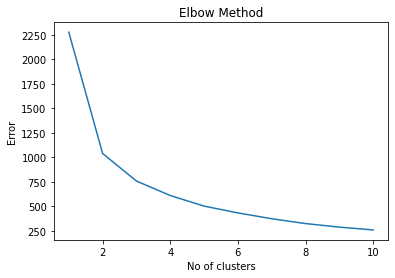

In [15]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Same error. Time to choose a different value for cluster

## Third approach with 3 cluster

In [16]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(df)
print(y_kmeans3)



[2 2 2 1 2 1 2 1 1 1 0 1 2 0 1 1 0 1 2 0 0 0 1 2 2 2 1 2 1 2 2 1 2 2 1 1 1
 0 0 1 0 1 2 1 0 2 0 1 0 0 0 0 0 2 0 0 2 1 0 0 0 0 1 0 1 1 0 0 1 0 2 1 1 0
 0 2 0 2 2 0 0 1 2 2 0 2 0 2 0 1 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 0 0 2 0 0
 1 1 0 0 0 0 1 1 0 0 2 2 0 0 0 0 2 1 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 2 0 0 0 0 2 2 0 2 0 0 0 2 0 0 0 1 0 0 0 1 1 0 0 2 2 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 2 2 1 0 2 2 1 0 0 0 0 1 0 2 0 2 1 1 1 1 0 2 2 0 0
 0 1 0 0 0 0 0 1 1 0 0 2 0 0 2 2 0 2 0 0 1 0 2 0 0 1 0 0 2 0 2 0 2 0 2 1 2
 1 2 0 2 0 2 2 0 0 0 1 0 0 2 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 2 0 0 0 0 1 1 1 0 0
 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 1 2 1 0 0 1 0 0 0 0 0 0 0 0 2 2 0 2 2
 1 0 2 2 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 2 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 2 0 1 0 0 0 0 1 2 0 0
 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 2 0 0 0 0 2 

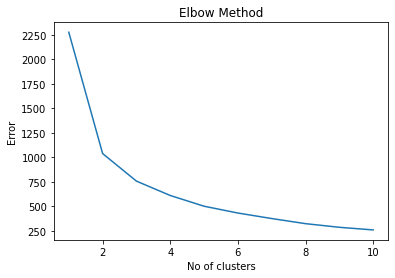

In [17]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The previous datasets were wrong for a personal error in keeping cluster at 1 and not changing iteratively


It looks like there is the elbow steep at 3 clusters meaning that we chose correctly

# Visualizing the Clustering

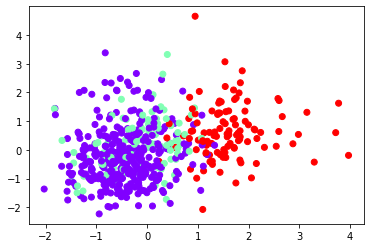

In [18]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans3, cmap='rainbow')

It appears that the purple and red cluster interchange many points so it might be better to have two clusters.

# Attempt with two clusters

In [19]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(df)
print(y_kmeans2)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

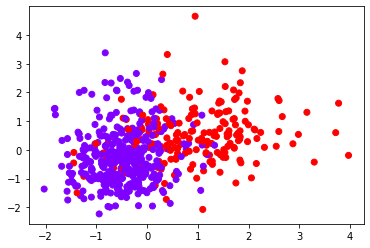

In [20]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans2, cmap='rainbow')

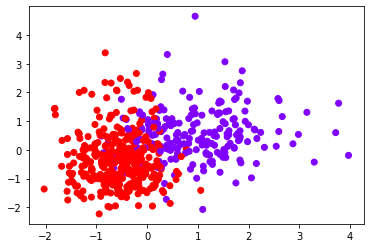

In [21]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=data.target, cmap='rainbow')

In [22]:
pca = PCA()

In [ ]:
pca_data = pca.fit_transform(df)

# Running different scores

Got this implementation from https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

In [26]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    preds = km.predict(x)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(x)))
    km_scores.append(-km.score(x))
    
    silhouette = silhouette_score(x,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(x,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -1039.0767769504316
Silhouette score for number of cluster(s) 2: 0.5282330822689583
Davies Bouldin score for number of cluster(s) 2: 0.7226570219657263
V-measure score for number of cluster(s) 2: 0.4813108114157896
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -757.9977846613039
Silhouette score for number of cluster(s) 3: 0.38477406767998457
Davies Bouldin score for number of cluster(s) 3: 0.9590000792982488
V-measure score for number of cluster(s) 3: 0.41909514394434877
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -610.3023446740115
Silhouette score for number of cluster(s) 4: 0.3580981695965892
Davies Bouldin score for number of cluster(s) 4: 0.8718264379218845
V-measure score for number of cluster(s) 4: 0.3216840727964887
---------------------------------------------------

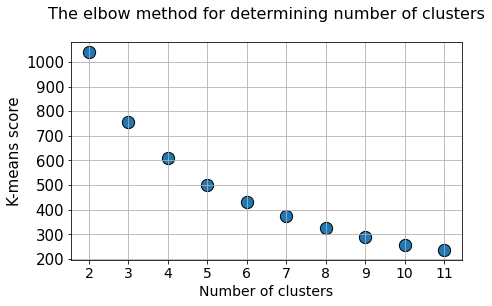

In [28]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

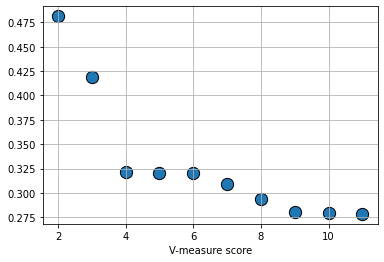

In [29]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

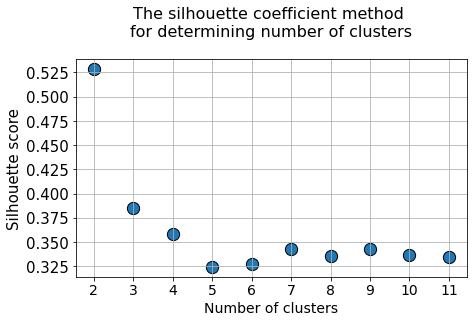

In [30]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

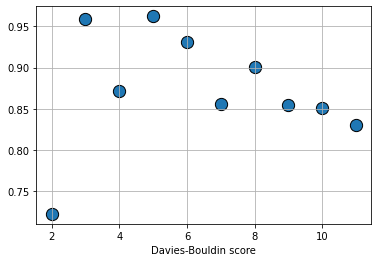

In [31]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()